In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
data = pd.read_csv('employee_reviews_sub.csv',sep=',')
#delete the useless column
data = data.drop(['Unnamed: 0'], axis= 1)
data = data.drop(['link'], axis= 1)
data = data.drop(['dates'], axis= 1)
data = data.drop(['helpful-count'], axis= 1)

In [4]:
data.head()

,company,location,job-title,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars
0,google,none,Current Employee - Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0
1,google,"Mountain View, CA",Former Employee - Program Manager,4.0,2.0,3.0,3.0,5.0,3.0
2,google,"New York, NY",Current Employee - Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0
3,google,"Mountain View, CA",Current Employee - Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0
4,google,"Los Angeles, CA",Former Employee - Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0


### Average ratings for different feature (by company)

In [5]:
ratings_comp = data[["company", 'overall-ratings', "work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]]
ratings_comp.set_index(["company"], inplace=True)
ratings_comp = ratings_comp[~(ratings_comp[['overall-ratings',"work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]] == "none").any(axis=1)]
ratings_comp[['overall-ratings',"work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]] = ratings_comp[['overall-ratings',"work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]].apply(pd.to_numeric)
avg_company = ratings_comp.groupby("company")['overall-ratings',"work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"].mean()
avg_company.columns = ['Overall Ratings',"Work Balance", "Culture Values", "Career Opportunities", "Company Benefits", "Senior Management"]
avg_company = avg_company.transpose()
avg_company

<ipython-input-5-c6f3c0bd8b51>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_company = ratings_comp.groupby("company")['overall-ratings',"work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"].mean()


company,amazon,apple,facebook,google,microsoft,netflix
Overall Ratings,3.605707,3.958919,4.518081,4.378480,3.859934,3.497976
Work Balance,3.010915,3.338017,3.904729,4.004104,3.575086,3.210526
Culture Values,3.532292,4.097873,4.515299,4.359208,3.657359,3.514170
Career Opportunities,3.621241,3.419399,4.365090,4.030692,3.710211,3.157895
Company Benefits,3.710779,4.059036,4.573018,4.427552,4.025453,4.257085
Senior Management,3.171875,3.446916,4.260779,3.871877,3.185432,3.192308


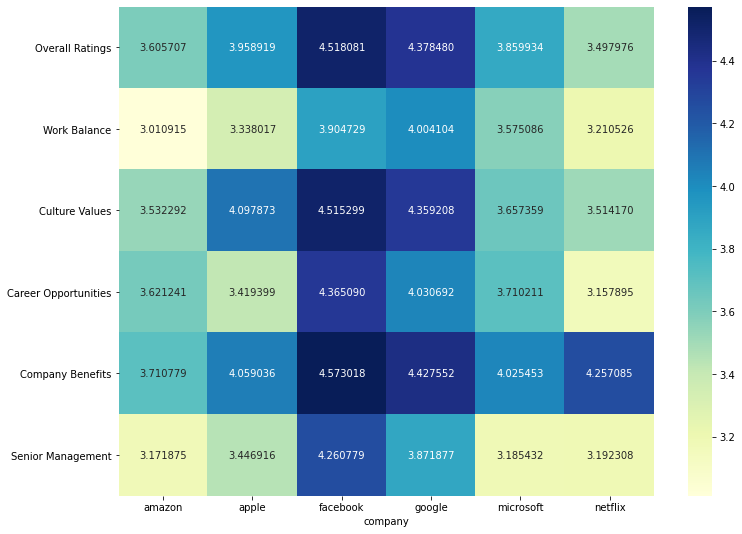

In [6]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(avg_company, cmap="YlGnBu",annot=True,fmt="f");
plt.show()

### Average ratings for different feature (by company and job title)

In [ ]:
# ratings_comp = ratings_comp[~(ratings_comp[["job-title",'overall-ratings',"work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]] == "none").any(axis=1)]
# ratings_comp[['overall-ratings',"work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]] = ratings_comp[['overall-ratings',"work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]].apply(pd.to_numeric)
# avg_job = ratings_comp.groupby(["company","job-title"])['overall-ratings',"work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"].mean()
# avg_job.columns = ['Overall Ratings',"Work Balance", "Culture Values", "Career Opportunities", "Company Benefits", "Senior Management"]
# avg_job

### Data Engeneering

In [7]:
data.columns

Index(['company', 'location', 'job-title', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars'],
      dtype='object')

In [35]:
#getting rid of the 'none' value into the ratings
data['culture-values-stars']= data['culture-values-stars'].replace(['none'],0)
data['overall-ratings']= data['overall-ratings'].replace(['none'],0)
data['work-balance-stars']= data['work-balance-stars'].replace(['none'],0)
data['carrer-opportunities-stars']= data['carrer-opportunities-stars'].replace(['none'],0)
data['comp-benefit-stars']= data['comp-benefit-stars'].replace(['none'],0)
data['senior-mangemnet-stars']= data['senior-mangemnet-stars'].replace(['none'],0)

In [10]:
# Encoding categorical data
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
data["Company_code"] =ord_enc.fit_transform(data[["company"]])
data["Job_code"]=ord_enc.fit_transform(data[["job-title"]])
data['Locations_code']=ord_enc.fit_transform(data[["location"]])

In [11]:
#delete the categorical&useless columns
data = data.drop(['company'], axis= 1)
data = data.drop(['location'], axis= 1)
data = data.drop(['job-title'], axis= 1)

In [36]:
data

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,Company_code,Job_code,Locations_code
0,5.0,4.0,5.0,5.0,4.0,5.0,3.0,252.0,2039.0
1,4.0,2.0,3.0,3.0,5.0,3.0,3.0,6982.0,1224.0
2,5.0,5.0,4.0,5.0,5.0,4.0,3.0,4113.0,1273.0
3,5.0,2.0,5.0,5.0,4.0,5.0,3.0,252.0,1224.0
4,5.0,5.0,5.0,5.0,5.0,5.0,3.0,7731.0,1056.0
...,...,...,...,...,...,...,...,...,...
67524,3.0,3.0,0,4.0,4.0,2.0,4.0,4995.0,2039.0
67525,3.0,1.5,0,2.5,4.0,2.5,4.0,3690.0,2039.0
67526,4.0,3.0,0,4.0,4.5,3.5,4.0,96.0,2039.0
67527,3.0,2.0,0,3.0,3.5,3.0,4.0,3910.0,2039.0


## Normalizing full dataframe

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #for normalize the values
data_norm= scaler.fit_transform(data)

In [42]:
data_new=pd.DataFrame(data_norm,columns=["overall-ratings","work-balance-stars","culture-values-stars","carrer-opportunities-stars","comp-benefit-stars","senior-mangemnet-stars","Company_code","Job_code","Locations_code"])

In [43]:
data_new

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,Company_code,Job_code,Locations_code
0,1.00,0.8,1.0,1.0,0.8,1.0,0.6,0.030336,0.998042
1,0.75,0.4,0.6,0.6,1.0,0.6,0.6,0.840496,0.599119
2,1.00,1.0,0.8,1.0,1.0,0.8,0.6,0.495125,0.623103
3,1.00,0.4,1.0,1.0,0.8,1.0,0.6,0.030336,0.599119
4,1.00,1.0,1.0,1.0,1.0,1.0,0.6,0.930661,0.516887
...,...,...,...,...,...,...,...,...,...
67524,0.50,0.6,0.0,0.8,0.8,0.4,0.8,0.601300,0.998042
67525,0.50,0.3,0.0,0.5,0.8,0.5,0.8,0.444204,0.998042
67526,0.75,0.6,0.0,0.8,0.9,0.7,0.8,0.011557,0.998042
67527,0.50,0.4,0.0,0.6,0.7,0.6,0.8,0.470687,0.998042


#### Now that we have only encoded data and the values are normalize, we can explore the data

#### Correlation

In [46]:
corr_matrix = data_new.corr()
corr_matrix

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,Company_code,Job_code,Locations_code
overall-ratings,1.000000,0.420761,0.435406,0.452091,0.293449,0.499244,0.101173,-0.144581,0.010044
work-balance-stars,0.420761,1.000000,0.573185,0.677499,0.689563,0.726844,0.148718,0.000432,-0.141325
culture-values-stars,0.435406,0.573185,1.000000,0.629610,0.599568,0.665273,-0.056145,-0.017724,-0.135207
carrer-opportunities-stars,0.452091,0.677499,0.629610,1.000000,0.743076,0.756889,0.026941,-0.010796,-0.133836
comp-benefit-stars,0.293449,0.689563,0.599568,0.743076,1.000000,0.700374,0.084857,0.055981,-0.160215
senior-mangemnet-stars,0.499244,0.726844,0.665273,0.756889,0.700374,1.000000,0.017112,-0.027290,-0.139761
Company_code,0.101173,0.148718,-0.056145,0.026941,0.084857,0.017112,1.000000,0.054548,0.071848
Job_code,-0.144581,0.000432,-0.017724,-0.010796,0.055981,-0.027290,0.054548,1.000000,-0.190683
Locations_code,0.010044,-0.141325,-0.135207,-0.133836,-0.160215,-0.139761,0.071848,-0.190683,1.000000


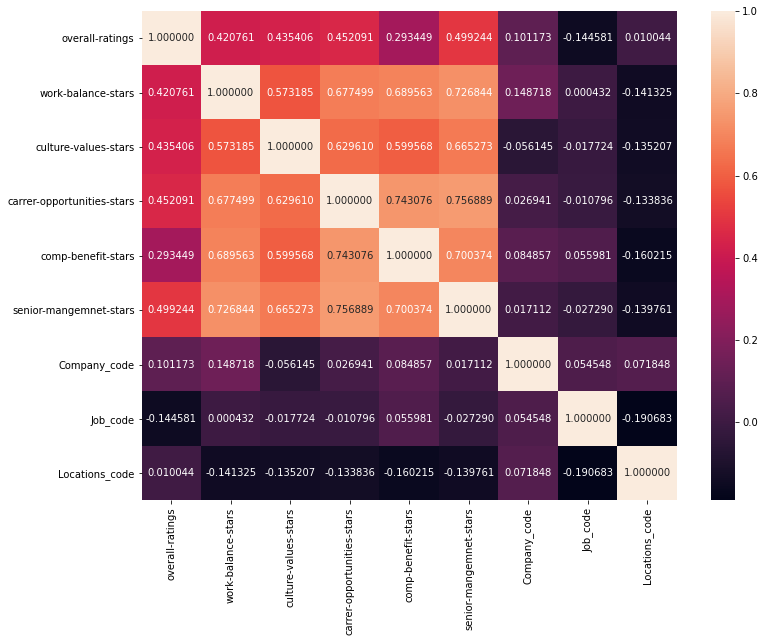

In [48]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt="f");

#### Data Visualization 

### Train - test splitting

In [ ]:
# we have to choose which cols are our features and which one are/is the target
feature_cols = [] #features cols name
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets selecting at random the 30% of the rows and assigning them to the test_set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


### Linear Regression

### Causal inference